In [1]:
import pandas as pd
from shapely.geometry import LineString, MultiLineString
from sklearn.cluster import KMeans
from bokeh.tile_providers import CARTODBPOSITRON
# Read data from file 'filename.csv'
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper
import geopandas as gpd
from bokeh.models import ColumnDataSource, Range1d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper
import libpysal
import esda
import numpy as np
import seaborn as sns
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import numpy as np
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper

In [2]:
# File paths Example
roads_Afr = r"data/roads/CAR_DATA_140731_Roads.shp"
grid_Afr = r"data/caf/caf_admbnda_adm1_200k_sigcaf_reach_itos_v2.shx"
roads_Afr = gpd.read_file(roads_Afr)
grid_Afr = gpd.read_file(grid_Afr)
print(roads_Afr)
print(grid_Afr)
# Create the color mapper
color_mapper = LogColorMapper(palette=palette)

      ONME              RTENME  FCLASS      FC_DESC  SRFTPE    ST_DESC  \
0     None                None     6.0  Track/Trail     3.0  Dirt/Sand   
1     None                None     6.0  Track/Trail     3.0  Dirt/Sand   
2     None                None     6.0  Track/Trail     3.0  Dirt/Sand   
3     None                None     6.0  Track/Trail     3.0  Dirt/Sand   
4     None                None     4.0     Tertiary     3.0  Dirt/Sand   
...    ...                 ...     ...          ...     ...        ...   
1963  None  Miamani-Golongosso     3.0    Secondary     3.0  Dirt/Sand   
1964  None                None     6.0  Track/Trail     3.0  Dirt/Sand   
1965  None  Miamani-Golongosso     3.0    Secondary     3.0  Dirt/Sand   
1966   RN2     Grimari-Bambari     2.0      Primary     2.0     Gravel   
1967  T016                None     6.0  Track/Trail     3.0  Dirt/Sand   

      SRFCOND          SC_DESC  SRFPREP      SP_DESC  ...     REGION_NOM  \
0         1.0   Rough (<40kph)     

In [3]:
#Get point coordinates
def getPointCoords(row, geom, coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

In [4]:
#Get line coordinates
def getLineCoords(row, geom, coord_type):
    """Returns a list of coordinates ('x' or 'y') of a LineString geometry"""
    if coord_type == 'x':
        return list( row[geom].coords.xy[0])
    elif coord_type == 'y':
        return list( row[geom].coords.xy[1])

In [5]:
#Get Poly coordinates
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""
    # Parse the exterior of the coordinate
    exterior = row[geom].exterior
    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0])
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1])

In [6]:
# Calculate x coordinates of the line
roads_Afr['x'] = roads_Afr.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)
print(roads_Afr['x'])
# Calculate y coordinates of the line
roads_Afr['y'] = roads_Afr.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)
print(roads_Afr['y'])
# Make a copy and drop the geometry column
# Get the Polygon x and y coordinates
grid_Afr['x'] = grid_Afr.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
grid_Afr['y'] = grid_Afr.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

m_df = roads_Afr.drop('geometry', axis=1).copy()
g_df = grid_Afr.drop('geometry', axis=1).copy()
# Point DataSource
msource = ColumnDataSource(m_df)
gsource = ColumnDataSource(g_df)

0       [26.208800000120018, 26.210699999605406, 26.21...
1       [22.0713467830043, 22.06490000013516, 22.05630...
2       [22.378700000105038, 22.374100000214884, 22.36...
3       [17.43600502041546, 17.420699999905136, 17.410...
4       [14.81609999981534, 14.827500000324793, 14.833...
                              ...                        
1963    [19.835500000424837, 19.817300000195097, 19.80...
1964    [22.034311000000077, 22.011748000000157, 22.00...
1965    [19.147250247970053, 19.148499999675376, 19.17...
1966    [20.351037743678273, 20.351386599811764, 20.38...
1967    [21.799845103833725, 21.79681808600003, 21.689...
Name: x, Length: 1968, dtype: object
0       [6.2301338682834775, 6.232933868803098, 6.2359...
1       [6.013448606566424, 6.010333868413337, 6.00973...
2       [6.391333868263555, 6.375333868763139, 6.36513...
3       [6.430396409666667, 6.415933868653173, 6.40223...
4       [6.262833868088652, 6.25893386900302, 6.254133...
                              ...  

In [7]:
# Initialize our plot figure
p = figure(title="Road Network of Central Africa")
# Plot grid
p.patches('x', 'y', source=gsource,
         fill_color={'field': 'Shape_Leng', 'transform': color_mapper},
         fill_alpha=1.0, line_color="black", line_width=0.05)

p.multi_line('x', 'y', source=msource, color='red', line_width=3)
# Output filepath
outfp = "data/test.html"
# Save the map
output_file(outfp)
show(p)

1968
0       20.513612
1        1.649995
2       75.953788
3       38.101928
4       50.292963
          ...    
1931     2.448348
1932    20.231634
1933     0.327212
1934     0.017513
1935     9.221083
Name: DIST_KM, Length: 1936, dtype: float64
0.10288313887566941


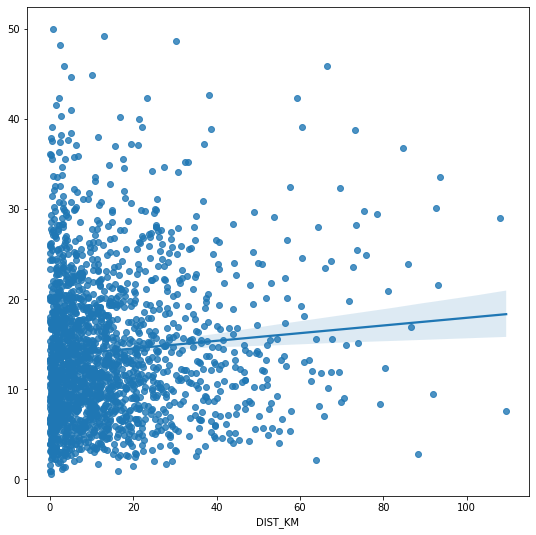

In [8]:
print(len(m_df['DIST_KM']))
lista = m_df['DIST_KM'][:1936]
print(lista)
w = libpysal.weights.lat2W(44,44)
w.transform = "R"
y1 = libpysal.weights.lag_spatial(w,lista)
spatial_auto = esda.Moran(y1, w)
print(spatial_auto.I)

# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x=lista, y=y1, data=lista)
# Display
plt.show()

In [9]:
print(g_df['Shape_Leng'])
X = np.array(m_df['DIST_KM'])
thres = np.mean(X)
thresm = X[3]
labels=[]
for i in X:
    if i > thres:
        lab='green'
    elif i > thresm:
        lab='red'
    else:
       lab='blue'
    labels.append(lab)
print(len(labels))
print(X)
X = X.reshape(-1,1)
print(len(X))

0      6.953577
1      7.744138
2      8.880095
3      7.713991
4     11.888650
5      6.526236
6      7.485577
7      8.986785
8     10.298540
9     12.300265
10    14.927941
11    17.816772
12    12.753072
13     9.340488
14    11.444920
15     6.527806
16     0.526807
Name: Shape_Leng, dtype: float64
1968
[20.51361151  1.64999524 75.95378771 ... 78.16147545 10.85231192
 31.49919258]
1968


In [10]:
X_train, X_test, y_train,y_test = train_test_split(X,labels,test_size=0.25)
('Xtrain shape roads knn {} and Xtest {}'.format(len(X_train),len(X_test)))
nbrs =neighbors.KNeighborsClassifier(n_neighbors=2, weights='uniform',algorithm='auto').fit(X_train, y_train)
prediction =nbrs.predict(X_test)
print(prediction)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
prediction = np.array(prediction)
X_train = X_train.reshape(len(X_train),1)
X_test = X_test.reshape(len(X_test),1)
y_train = y_train.reshape(len(y_train),1)
prediction = prediction.reshape(len(prediction),1)
TrainRoad=np.hstack((X_train,y_train))
TestRoad = np.hstack((X_test,prediction))
Ds = np.vstack((TrainRoad,TestRoad))
print(Ds[:,1])
m_df['KM_LTM']= pd.DataFrame(data = Ds[:,1], columns=['KM'])
m_df['DIST_KM']= pd.DataFrame(data= Ds[:,0], columns=['DIST_KM'])
# Point DataSource
msource2 = ColumnDataSource(m_df)
gsource = ColumnDataSource(g_df)

['blue' 'green' 'blue' 'green' 'blue' 'blue' 'blue' 'blue' 'green' 'green'
 'blue' 'blue' 'green' 'blue' 'green' 'blue' 'blue' 'green' 'blue' 'green'
 'green' 'blue' 'green' 'green' 'blue' 'blue' 'green' 'green' 'green'
 'blue' 'green' 'blue' 'blue' 'blue' 'blue' 'blue' 'green' 'blue' 'blue'
 'green' 'blue' 'green' 'blue' 'blue' 'blue' 'green' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'green'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'green'
 'blue' 'blue' 'green' 'blue' 'blue' 'green' 'blue' 'blue' 'green' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'green' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'green' 'blue' 'green' 'blue' 'green' 'blue'
 'blue' 'blue' 'blue' 'blue' 'green' 'green' 'green' 'green' 'blue'
 'green' 'blue' 'blue' 'blue' 'green' 'blue' 'blue' 'blue' 'green' 'blue'
 'blue' 'green' 'blue' 'blue' 'blue' 'green' 'green' 'blue' 'green'
 'green' 'blue' 'blue' 'blue' 'green' 'blue' 'blue' 'blue' 

In [11]:
# Initialize our plot figure
#f = figure(title="Road Network of Central Africa")
# Plot grid
#f.patches('x', 'y', source=gsource,
#         fill_color={'field': 'Shape_Leng', 'transform': color_mapper},
#         fill_alpha=1.0, line_color="black", line_width=0.05)

#f.multi_line('x', 'y', source=msource2,
#             line_color='KM_LTM',
#             line_alpha=0.5, line_width=3)
# Output filepath
#outff = "data/tesd.html"
# Save the map
#output_file(outff)
#show(f)

In [16]:
A_p = r"data/southAfrica/healthsites.shp"
A_r = r"data/southAfrica/Roads_AICD.shp"
# Calculate x coordinates of the line
A_p['x'] = A_p.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
# Calculate y coordinates of the line
A_p['y'] = A_p.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

p_df = A_p.drop('geometry', axis=1).copy()
#g_df = A_g.drop('geometry', axis=1).copy()
#gsource = ColumnDataSource(g_df)

datapoints = p_df['healthcare']

AttributeError: 'str' object has no attribute 'apply'

In [14]:
d_n=[]
colors=[]
for i in range(len(datapoints)):
    if datapoints[i]=='hospital':
        value=1
        color='red'
    elif datapoints[i]=='clinic':
        value=2
        color='blue'
    elif datapoints[i]=='dentist':
        value=3
        color='orange'
    else:
        value=0
        color='yellow'
    d_n.append(value)
    colors.append(color)

NameError: name 'datapoints' is not defined

In [13]:
p_df['CL']= pd.DataFrame(data = colors , columns=['CL'])
psource = ColumnDataSource(p_df)

NameError: name 'colors' is not defined

In [15]:
print(d_n)
fmatrix=[]
for i in range(len(p_df['x'])):
    #print(p_df['x'][i])
    #print(int(str(p_df['x'][i])[:2]))
    for d in range(len(p_df['x'])):
        #print(p_df['x'][d])
        init = int(str(p_df['x'][i])[:2])
        nvar = int(str(p_df['x'][d])[:2])
        if init==nvar:
            neigh = p_df['x'][d]
        else:
            neigh=0
        fmatrix.append([i,p_df['x'][i],neigh])
print(len(fmatrix))
print(fmatrix)
matrix = np.array(fmatrix)
Dataset=[]
for i in range(len(p_df['x'])):
    result = np.where(matrix == i)
    neighboors = matrix[result[0]]
    nei=[]
    for q in range(len(neighboors[:,2])):
        if  neighboors[:,2][q] > 0:
            nei.append(q)
    nn = np.array(nei)
    Stand = len(nn)
    Standarization=[]
    for b in nn:
        resultie = 1/Stand * neighboors[:,2][b]
        Standarization.append(resultie)
    total = sum(Standarization)
    Dataset.append([i,p_df['x'][i],total,d_n[i]])

[]


NameError: name 'p_df' is not defined

In [ ]:
print(Dataset)
dfD = pd.DataFrame(Dataset)
dfD = dfD.sort_values(dfD.columns[3] , ascending=False)
dfDtr =dfD[:125]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 20]
x=dfDtr[dfDtr.columns[1]]
print(x)
y=dfDtr[dfDtr.columns[2]]
print(y)
print(len(x))
print(len(y))
df = pd.DataFrame({'Spatial_Lag':y,
                   'log':x})
ax = df.plot.bar(x='log', y='Spatial_Lag',fontsize=8, rot=90)

In [ ]:
dfDte =dfD[125:]
from sklearn import svm
Xtr =np.array(dfDtr[dfDtr.columns[1]]).reshape(125,1)
Xtr1 =np.array(dfDtr[dfDtr.columns[2]]).reshape(125,1)
Xtrain = np.hstack((Xtr,Xtr1))
ytr = np.array(dfDtr[dfDtr.columns[3]]).reshape(125,1)
Xte = np.array(dfDte[dfDte.columns[1]]).reshape(1226,1)
Xte1 = np.array(dfDte[dfDte.columns[2]]).reshape(1226,1)
#yte = np.array(dfDte[dfDte.columns[3]]).reshape(1226,1)
Xtest = np.hstack((Xte,Xte1))
clf = svm.SVC()
clf.fit(Xtrain, ytr)
yte=clf.predict(Xtest)
yte = np.array(yte).reshape(1226,1)
Train =np.hstack((Xtrain,ytr))
Test = np.hstack((Xtest,yte))
Datasetl = np.vstack((Train,Test))
xplt = list(p_df['x'])
data = list(dfD[dfD.columns[2]])
#
#lista = m_df['DIST_KM'][:1936]
print(len(xplt))
xplti = xplt[:1296]
w = libpysal.weights.lat2W(36,36)
w.transform = "R"
y1 = libpysal.weights.lag_spatial(w,xplti)
spatial_auto = esda.Moran(y1, w)
print(spatial_auto.I)
import seaborn as sns
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x=xplti, y=y1, data=xplti)
# Display
plt.show()

In [ ]:
colorsl=[]
for i in range(len(Datasetl)):
    if Datasetl[:,2][i]==1:
        color='red'
    elif Datasetl[:,2][i]==2:
        color='blue'
    elif Datasetl[:,2][i]== 3:
        color='orange'
    else:
        value=0
        color='yellow'
    colorsl.append(color)

yplt = list(p_df['y'])
yplt=np.array(yplt).reshape(len(yplt),1)
colorsl=np.array(colorsl).reshape(len(colorsl),1)
ycol = np.hstack((yplt,colorsl))
Datasetl=np.hstack((Datasetl,ycol))
df_l= pd.DataFrame(Datasetl, columns=['x','spatial_lag','type','y','color'])
sortx = np.array(p_df['x']).reshape(len(colorsl),1)
print(len(sortx))
colorll=[]
for i in xplt:
    print(i)
    colora=colorsl[np.where(sortx == i)]
    print(colora)
    colorll.append(str(colora[0]))
p_df['CL']= pd.DataFrame(data = colorll, columns=['CL'])
psourcel = ColumnDataSource(p_df)

In [ ]:
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper
# Create the color mapper
color_mapper = LogColorMapper(palette=palette)
# Initialize our figure
p = figure(title="South-Africa Network")
# Add schools on top (as yellow points)
p.circle('x', 'y', size=3, source=psourcel,
         color='CL')
# let's also add the hover over info tool
tooltip = HoverTool()
tooltip.tooltips = [('Healthcare Type', '@healthcare'),
#                    ('Type of road', '@TYYP'),
                    ('Fcode', '@f_code')]
p.add_tools(tooltip)

# Save the figure
outfp = r"data\roads_pop_kmad_asap.html"
output_file(outfp)
show(p)